# Практическое задание 2 (часть 1)

# Определение частей речи с помощью скрытой марковской модели

## курс "Математические методы анализа текстов"


### ФИО: Алексеев Василий Антонович

## Введение

### Постановка задачи

В данной лабораторной работе вам предстоит обучить скрытую марковскую модель на размеченных данных и реализовать алгоритм Витерби для задачи POS-теггинга (определение частей речи слов в тексте), а также ознакомиться с использованием  ряда POS-теггеров из библиотеки NLTK.

### Комментарии и советы

1. Для выполнения потребуются модули Python numpy, nltk.

2. Все необходимые для выполнения задания данные либо приложены, либо могут быть скачаны с помощью nltk.download().

3. Посмотреть параметры конструктора и других методов классов можно набрав и выполнив в ячейке с кодом '?full_method_name'.

### Задача определения частей речи (POS)

Мы будем решать задачу определения частей речи (POS-теггинга) с помощью скрытой марковской модели (HMM). Формула совместной плотности наблюдаемых и скрытых переменных задается как

$$ p(x, t) = p(t) p(x|t) = p(t_1)  \prod_{i=2}^{N_x} p(t_i|t_{i-1}) \prod_{i=1}^{N_x} p(x_i|t_i)$$

#### Переменные модели

- наблюдаемые переменные $X$ - словарь корпуса;

- скрытые переменные $T$ - множество POS-тегов.

- x - одно предложение, $N_x$ - длина предложения

- t - теги одного предложения, $N_t$ - длина вектора меток

#### Параметры модели

- матрица вероятностей переходов $A \in \mathbb{R}^{|T| \times |T|}$, $A_{ij} = p(t_s=i|t_{s-1}=j) \; \forall s$

- матрица выходных вероятностей $B \in \mathbb{R}^{|X| \times |T|}$, $B_{ij} = p(x_s =i|t_s =j) \; \forall s$

- вектор начальных вероятностей $C \in \mathbb{R}^{|T|}$, $C_i = p(t_1=i)$


#### Обучение модели

* Для обучения параметров $A$ и $B$ используется метод максимума правдоподобия. Оценки вычисляются на основе частот совстречаемости тегов и тегов со словами ():

$$a_{ij} = \frac{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = i, t_{s - 1} = j]}{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = j]}$$

$$b_{ij} = \frac{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[x_{s} = i, t_{s} = j]}{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[t_{s} = j]}$$

* Параметры $C$ можно аналогично вычислять по частотам или считать распределение $p(t_1)$ равномерным

#### Применение модели

Применение модели на новых данных реализуется с помощью алгоритма Витерби.Это алгоритм динамиеского программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{t} = \arg \max_{t} p(t|x) = \arg \max_{t} p(x, t) $$

Определим функцию, определяющую максимальную вероятность последовательности, заканчивающейся на $i$-ой позиции в состоянии $k$:

$$\delta(k, i) = \max_{t_1, \dots t_{i-1}} p(x_1, \dots x_i, t_1, \dots t_i=k)$$

Тогда $\max_{k} \delta(k, N_x)$ - максимальная вероятность всей последовательности. А состояния, на которых эта вероятность достигается - ответ задачи.

Алгоритм Витерби заключается в последовательном пересчете функции $\delta(k, i)$ по формуле:

$$\delta(k, i) = \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$

Аналогично пересчитывается функция, определяющая, на каком состоянии этот максимум достигается:

$$s(k, i) = \arg \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$


На практике это означает заполнение двумерных массивов размерности: (длина последовательности) $\times$ (количество возможных состояний). Когда массивы заполнены, $\arg \max_{k} \delta(k, N_x)$ говорит о последнем состоянии. Начиная с него можно восстановить все состояния по массиву $s$. 

Осталось уточнить, как стартовать последовательный пересчет (чем заполнить первый столбец массива вероятностей):

$$\delta(k, 1) = p(k) p(x_1|t_1=k)$$

Подробнее о HMM можно прочитать по [ссылке](https://web.stanford.edu/~jurafsky/slp3/A.pdf)

## Часть 1. Загрузка корпуса (1 балл)

Загрузите brown корпус с универсальной системой тегирования. Для этого вам понадобятся ресурсы brown и universal_tagset из nltk.download().  

Так как каждый конкретный датасет может использовать свою систему тегов, в NLTK предусмотрено универсальное множество тегов и возможность приведения к нему других систем. Это множество включает в себя следующие теги:


- ADJ - adjective (new, good, high, ...)
- ADP - adposition	(on, of, at, ...)
- ADV - adverb	(really, already, still, ...)
- CONJ	- conjunction	(and, or, but, ...)
- DET - determiner, article	(the, a, some, ...)
- NOUN	- noun	(year, home, costs, ...)
- NUM - numeral	(twenty-four, fourth, 1991, ...)
- PRT -	particle (at, on, out, ...)
- PRON - pronoun (he, their, her, ...)
- VERB - verb (is, say, told, ...)
- .	- punctuation marks	(. , ;)
- X	- other	(ersatz, esprit, dunno, ...)

Обратите внимание, что тегсеты в корпусах текстов и в различных теггерах могут быть разными. Проверять это можно, глядя на сами теги, а симптом - подозрительно низкое качество теггирования. В таких случаях рекомендуется всё приводить сперва к универсальному тегсету, а потом уже мерять качество. Полезной может оказаться эта ссылка http://www.nltk.org/_modules/nltk/tag/mapping.html

In [41]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
import nltk

nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/alvant/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [31]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(tagset="universal")

# you code here

In [4]:
len(brown.sents())

57340

In [5]:
len(brown.tagged_sents())

57340

In [6]:
brown.sents()[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

In [7]:
brown.tagged_sents()[0]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [32]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [8]:
brown.tagged_paras()[0]

[[('The', 'AT'),
  ('Fulton', 'NP-TL'),
  ('County', 'NN-TL'),
  ('Grand', 'JJ-TL'),
  ('Jury', 'NN-TL'),
  ('said', 'VBD'),
  ('Friday', 'NR'),
  ('an', 'AT'),
  ('investigation', 'NN'),
  ('of', 'IN'),
  ("Atlanta's", 'NP$'),
  ('recent', 'JJ'),
  ('primary', 'NN'),
  ('election', 'NN'),
  ('produced', 'VBD'),
  ('``', '``'),
  ('no', 'AT'),
  ('evidence', 'NN'),
  ("''", "''"),
  ('that', 'CS'),
  ('any', 'DTI'),
  ('irregularities', 'NNS'),
  ('took', 'VBD'),
  ('place', 'NN'),
  ('.', '.')]]

In [10]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [11]:
len(brown.tagged_words())

1161192

In [12]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [14]:
words_counter = Counter(brown.words())

In [33]:
tags_counter = Counter(wt[1] for s in brown_tagged_sents for wt in s)

In [16]:
words_counter.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

In [34]:
tags_counter.most_common(10)

[('NOUN', 275558),
 ('VERB', 182750),
 ('.', 147565),
 ('ADP', 144766),
 ('DET', 137019),
 ('ADJ', 83721),
 ('ADV', 56239),
 ('PRON', 49334),
 ('CONJ', 38151),
 ('PRT', 29829)]

In [49]:
lens = [len(s) for s in brown.sents()]

for p in [5, 10, 25, 50, 75, 90, 95]:
    print(f'{p:2} percentile len =', np.percentile(lens, p))

 5 percentile len = 4.0
10 percentile len = 6.0
25 percentile len = 11.0
50 percentile len = 18.0
75 percentile len = 27.0
90 percentile len = 37.0
95 percentile len = 44.0


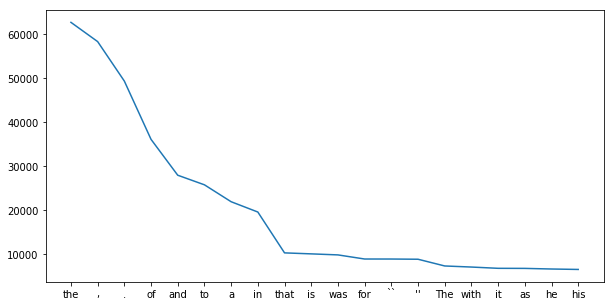

In [24]:
fig = plt.figure(figsize=(10, 5))

most_common = words_counter.most_common(20)

names = [mc[0] for mc in most_common]
x = [i for i in range(len(most_common))]
y = [mc[1] for mc in most_common]

plt.plot(x, y)

plt.xticks(x, names)

plt.show()

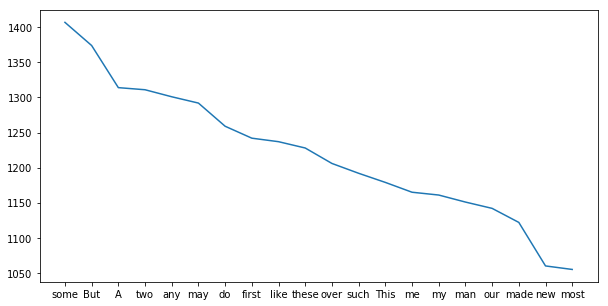

In [40]:
fig = plt.figure(figsize=(10, 5))

most_common = words_counter.most_common(100)
subset_most_common = most_common[80:]

names = [mc[0] for mc in subset_most_common]
x = [i for i in range(len(subset_most_common))]
y = [mc[1] for mc in subset_most_common]

plt.plot(x, y)

plt.xticks(x, names)

plt.show()

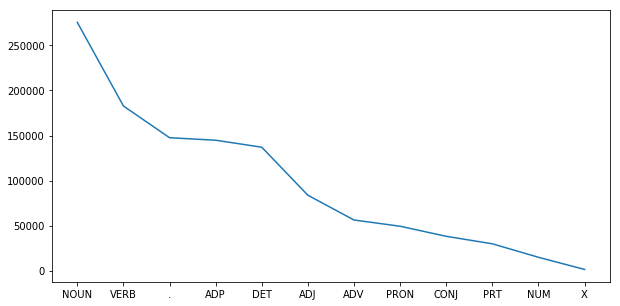

In [35]:
fig = plt.figure(figsize=(10, 5))

most_common = tags_counter.most_common(20)

names = [mc[0] for mc in most_common]
x = [i for i in range(len(most_common))]
y = [mc[1] for mc in most_common]

plt.plot(x, y)

plt.xticks(x, names)

plt.show()

Проанализируйте данные, с которыми Вы работаете. В частности, ответьте на вопросы:
- Каков общий объем датасета, формат?
- Приведены ли слова к нижнему регистру? Чем  это нам может в дальнейшем помешать?
- Как распределены слова в корпусе?  Как распределены теги в корпусе? Подсчитайте частоты и отобразите любым удобным для Вас способом. Проинтерпретируйте полученные результаты.

In [ ]:
# your answers here

* 57.340 предложений, 1.161.192 слов (с тегами)
* Слова не приведены к нижнему регистру. Может помешать в том плане, что модель, обученная на словах как есть может быть менее надёжной, чем модель, обученная на словах только в нижнем регистре. Хотя для первой модели не обязательно будет делать предобработку текста на стадии предсказания тэгов на новом тексте
* Самые частые слова — неинформативные, причём в топе есть одинаковые слова, отличающиеся только регистром. На первые десять слов приходится очень большая часть от общего количества частот. Самые частые теги — существительные и глаголы. Но далее идут знаки препинания и союзы-частицы. И после них прилагательные и наречия

Cделайте случайное разбиение выборки на обучение и контроль в отношении 9:1.Если впоследствии обучение моделей будет занимать слишком много времени, работайте с подвыборкой, например, только текстами определенных категорий.

In [51]:
# your code here

all_indices = list(range(len(brown_tagged_sents)))

train_fraction = 0.9
train_indices = np.random.choice(
    all_indices, int(len(all_indices) * train_fraction), replace=False
)

train_sents = [s for i, s in enumerate(brown_tagged_sents) if i in train_indices]
test_sents = [s for i, s in enumerate(brown_tagged_sents) if i not in train_indices]

print(f'len(train) / len(test):\n{len(train_sents)} / {len(test_sents)} = {len(train_sents) / len(test_sents)}')

len(train) / len(test):
51606 / 5734 = 9.0


## Часть 2. Скрытая марковская модель (4 балла) 

### Метод максимального правдоподобия для обучения модели

Требуется построить скрытую марковскую модель (class HiddenMarkovModel) и написать метод fit для настройки всех её параметров с помощью оценок максимального правдоподобия по размеченным данным (последовательности пар слово+тег):

- Вероятности переходов между скрытыми состояниями $p(t_i | t_{i - 1})$ посчитайте на основе частот биграмм POS-тегов.

- Вероятности эмиссий наблюдаемых состояний $p(x_i | t_i)$ посчитайте на основе частот "POS-тег - слово".

- Обратите внимание на проблему разреженности счетчиков и сделаейте все вероятности сглаженными по Лапласу ([add-k smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)).

- Распределение вероятностей начальных состояний $p(t_1)$ задайте равномерным.


### Алгоритм Витерби для применения модели

Требуется написать метод .predict для определения частей речи на тестовой выборке. Чтобы использовать обученную модель на новых данных, необходимо реализовать алгоритм Витерби. 

В реализации рекомендуется перейти к логарифмам, т.к. произведение большого числа маленьких вероятностей может приводить к вычислительным ошибкам.

#### Обучение модели

* Для обучения параметров $A$ и $B$ используется метод максимума правдоподобия. Оценки вычисляются на основе частот совстречаемости тегов и тегов со словами ():

$$a_{ij} = \frac{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = i, t_{s - 1} = j]}{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = j]}$$

$$b_{ij} = \frac{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[x_{s} = i, t_{s} = j]}{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[t_{s} = j]}$$

* Параметры $C$ можно аналогично вычислять по частотам или считать распределение $p(t_1)$ равномерным

#### Применение модели

Применение модели на новых данных реализуется с помощью алгоритма Витерби.Это алгоритм динамиеского программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{t} = \arg \max_{t} p(t|x) = \arg \max_{t} p(x, t) $$

Определим функцию, определяющую максимальную вероятность последовательности, заканчивающейся на $i$-ой позиции в состоянии $k$:

$$\delta(k, i) = \max_{t_1, \dots t_{i-1}} p(x_1, \dots x_i, t_1, \dots t_i=k)$$

Тогда $\max_{k} \delta(k, N_x)$ - максимальная вероятность всей последовательности. А состояния, на которых эта вероятность достигается - ответ задачи.

Алгоритм Витерби заключается в последовательном пересчете функции $\delta(k, i)$ по формуле:

$$\delta(k, i) = \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$

Аналогично пересчитывается функция, определяющая, на каком состоянии этот максимум достигается:

$$s(k, i) = \arg \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$


На практике это означает заполнение двумерных массивов размерности: (длина последовательности) $\times$ (количество возможных состояний). Когда массивы заполнены, $\arg \max_{k} \delta(k, N_x)$ говорит о последнем состоянии. Начиная с него можно восстановить все состояния по массиву $s$. 

Осталось уточнить, как стартовать последовательный пересчет (чем заполнить первый столбец массива вероятностей):

$$\delta(k, 1) = p(k) p(x_1|t_1=k)$$

Подробнее о HMM можно прочитать по [ссылке](https://web.stanford.edu/~jurafsky/slp3/A.pdf)

In [142]:
class HiddenMarkovModel:
    def __init__(self, k_smoothing=1.0):
        """
        k_smoothing : float, constant in add-k-smoothing
        """
        self.k_smoothing = k_smoothing
        
        self.A = None
        self.B = None
        self.C = None
        
        self.token2index = None
        self.tag2index = None
        self.index2tag = None
        
    def fit(self, train_tokens_tags_list):
        """
        Fit the model using maximum likelihood method.
        
        train_tokens_tags_list: list of list of pairs (token, tag) 
        """
        unique_tokens = list(set([tt[0] for s in train_tokens_tags_list for tt in s]))
        unique_tags = list(set([tt[1] for s in train_tokens_tags_list for tt in s]))
        
        self.A = np.zeros((len(unique_tags), len(unique_tags)))
        self.B = np.zeros((len(unique_tokens), len(unique_tags)))
        
        self.token2index = {w: i for i, w in enumerate(unique_tokens)}
        self.tag2index = {t: i for i, t in enumerate(unique_tags)}
        self.index2tag = {i: t for i, t in enumerate(unique_tags)}
        
        self._fill_A(train_tokens_tags_list)
        self._fill_B(train_tokens_tags_list)
        
        self.C = np.ones((len(unique_tags))) / len(unique_tags)
    
    def predict(self, test_tokens_list):
        """
        Return predictions for test_tokens_list using viterbi algorithm.
        
        test_tokens_list : list of list of tokens
        
        return: list of list of tags
        """
        def predict(tokens):
            probs = [[0 for _ in range(len(tokens))] for t in self.tag2index]

            for t, t_index in self.tag2index.items():
                if tokens[0] in self.token2index:
                    probs[t_index][0] = np.exp(
                        self._log(self.C[t_index]) +
                        self._log(self.B[self.token2index[tokens[0]], t_index])
                    )
                else:
                    probs[t_index][0] = np.exp(
                        self._log(self.C[t_index]) + 0
                    )
            
            for l in range(1, len(tokens)):
                token = tokens[l]
                
                if token not in self.token2index:  # unknown word
                    for t, t_index in self.tag2index.items():
                        probs[t_index][l] = 0

                    continue

                for t, t_index in self.tag2index.items():
                    probs[t_index][l] = np.exp(max(
                        self._log(probs[m][l - 1]) +
                        self._log(self.A[t_index, m]) +
                        self._log(self.B[self.token2index[tokens[l]], t_index])
                        for m in range(len(self.tag2index))
                    ))
            
            predictions = []
            
            for token_index in range(len(tokens)):
                tag_index = np.argmax([probs[j][token_index] for j in range(len(self.tag2index))])
                tag = self.index2tag[tag_index]
                
                predictions.append(tag)
            
            return predictions
    
        result = []
        
        for tokens in test_tokens_list:
            result.append(predict(tokens))
        
        return result

    def _fill_A(self, train_tokens_tags_list):
        def compute_value_for_cell(i, t_i, j, t_j):
            numerator = 0.0
            denominator = 0.0
            
            for s in train_tokens_tags_list:
                tags = [tt[1] for tt in s]
                
                for t1, t2 in zip(tags[:-1], tags[1:]):
                    numerator   += 1 * (t2 == t_i and t1 == t_j)
                    denominator += 1 * (              t1 == t_j)
            
            return (
                (numerator + self.k_smoothing) /
                (max(denominator, 1) + self.A.shape[0] * self.k_smoothing)
            )

        for t_i, i in self.tag2index.items():
            for t_j, j in self.tag2index.items():
                self.A[i, j] = compute_value_for_cell(i, t_i, j, t_j)
    
    def _fill_B(self, train_tokens_tags_list):
        def compute_value_for_cell(i, tok_i, j, t_j):
            numerator = 0.0
            denominator = 0.0
            
            for s in train_tokens_tags_list:
                tokens = [tt[0] for tt in s]
                tags = [tt[1] for tt in s]
                
                for tok, t in zip(tokens, tags):
                    numerator   += 1 * (tok == tok_i and t == t_j)
                    denominator += 1 * (                 t == t_j)
            
            return (
                (numerator + self.k_smoothing) /
                (max(denominator, 1) + self.B.shape[0] * self.k_smoothing)
            )

        for tok_i, i in self.token2index.items():
            for t_j, j in self.tag2index.items():
                self.B[i, j] = compute_value_for_cell(i, tok_i, j, t_j)
    
    def _log(self, value):
        if value == 0:
            return 0

        return np.log(value)

Обучите скрытую марковскую модель:

In [145]:
# your code here

hmm = HiddenMarkovModel(k_smoothing=1.0)

hmm.fit(train_sents[:100])

In [146]:
hmm.A

array([[0.01492537, 0.00996678, 0.01232877, 0.01886792, 0.03759398,
        0.05494505, 0.02666667, 0.01449275, 0.07142857, 0.04      ,
        0.00787402],
       [0.05970149, 0.01328904, 0.02054795, 0.03773585, 0.18045113,
        0.2032967 , 0.09333333, 0.04347826, 0.16071429, 0.41454545,
        0.01574803],
       [0.01492537, 0.7076412 , 0.27808219, 0.28301887, 0.12030075,
        0.14285714, 0.02666667, 0.01449275, 0.32142857, 0.30909091,
        0.7480315 ],
       [0.01492537, 0.01328904, 0.01780822, 0.05660377, 0.01253133,
        0.03846154, 0.01333333, 0.01449275, 0.03571429, 0.05454545,
        0.00787402],
       [0.65671642, 0.06312292, 0.17260274, 0.01886792, 0.22807018,
        0.12637363, 0.36      , 0.66666667, 0.17857143, 0.04363636,
        0.00787402],
       [0.08955224, 0.00996678, 0.20547945, 0.26415094, 0.0726817 ,
        0.15934066, 0.13333333, 0.05797101, 0.03571429, 0.01818182,
        0.07086614],
       [0.04477612, 0.00996678, 0.01643836, 0.01886792, 0.

In [147]:
hmm.B

array([[0.00104384, 0.00083893, 0.00184615, ..., 0.00105597, 0.00085763,
        0.00098232],
       [0.00104384, 0.00083893, 0.00061538, ..., 0.00105597, 0.00085763,
        0.00196464],
       [0.00104384, 0.00083893, 0.00123077, ..., 0.00105597, 0.00085763,
        0.00098232],
       ...,
       [0.00104384, 0.00083893, 0.00061538, ..., 0.00105597, 0.00085763,
        0.00098232],
       [0.00104384, 0.04530201, 0.00061538, ..., 0.00105597, 0.00085763,
        0.00098232],
       [0.00104384, 0.00083893, 0.00184615, ..., 0.00105597, 0.00085763,
        0.00098232]])

In [148]:
pred = hmm.predict(brown.sents()[:10])

In [149]:
pred[:20]

[['DET',
  'NOUN',
  'NOUN',
  'PRON',
  'PRON',
  'VERB',
  'NOUN',
  'DET',
  'PRON',
  'ADP',
  'NOUN',
  'PRON',
  'NOUN',
  'NOUN',
  'PRON',
  '.',
  'DET',
  'PRON',
  '.',
  'ADP',
  'PRON',
  'NOUN',
  'VERB',
  'VERB',
  '.'],
 ['DET',
  'NOUN',
  '.',
  'VERB',
  'ADP',
  'NOUN',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  '.',
  'NOUN',
  '.',
  'DET',
  'NOUN',
  '.',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  '.',
  '.',
  'VERB',
  'DET',
  'NOUN',
  'CONJ',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'NOUN',
  '.',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'DET',
  'DET',
  'NOUN',
  'VERB',
  'VERB',
  '.'],
 ['DET',
  'NOUN',
  'NOUN',
  'NOUN',
  'VERB',
  'VERB',
  'VERB',
  'ADP',
  'NOUN',
  '.',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  'ADP',
  'VERB',
  'NOUN',
  'ADP',
  'DET',
  '.',
  'NOUN',
  '.',
  'ADP',
  'DET',
  'NOUN',
  'NOUN',
  'DET',
  'VERB',
  'VERB',
  'ADP',
  'NOUN',
  'NOUN',
  'NOUN',
  'NOUN',
  '.'],
 ['.',
  'DET',
  'DET',
  'NOUN',
  'NOUN

Проверьте работу реализованного алгоритма на следующих модельных примерах, проинтерпретируйте результат.

- 'he can stay'
- 'a milk can'
- 'i saw a dog'
- 'an old saw'

In [ ]:
# your code here

In [150]:
hmm.predict([
    'he can stay'.split(),
    'a milk can'.split(),
    'i saw a dog'.split(),
    'an old saw'.split()
])

[['PRON', 'VERB', 'PRON'],
 ['DET', 'PRON', 'VERB'],
 ['PRON', 'VERB', 'DET', 'PRON'],
 ['DET', 'NOUN', 'VERB']]

Примените модель к отложенной выборке Брауновского корпуса и подсчитайте точность определения тегов (accuracy). Сделайте выводы. 

In [152]:
test_sents_words = [[wt[0] for wt in s] for s in test_sents]
test_sents_tags  = [[wt[1] for wt in s] for s in test_sents]

In [154]:
prediction = hmm.predict(test_sents_words)

In [155]:
accuracy = (
    sum(sum(1 * (tt == pt) for tt, pt in zip(true_tags, pred_tags))
        for true_tags, pred_tags in zip(test_sents_tags, prediction)
    ) /
    sum(len(s) for s in test_sents_words)
)

In [156]:
print(accuracy)

0.4931336697733807


In [162]:
def compute_accuracy(true_tags, pred_tags):
    return (
        sum(sum(1 * (tt == pt) for tt, pt in zip(true_tags, pred_tags))
            for true_tags, pred_tags in zip(true_tags, pred_tags)
        ) /
        sum(len(s) for s in true_tags)
    )

## Бонусная часть. Сравнение с готовыми POS-теггерами из NLTK (2 балла)

В прошлом пункте Вы реализовали свой POS-тегер на основе скрытой марковской модели. Теперь сравните его работу с готовыми средставми, доступными в библиотеке NLTK: http://www.nltk.org/api/nltk.tag.html

Сравните с вашей моделью любые из 4-х теггеров, представленных ниже.

При проведении экспериментов обращайте внимание на следующие моменты (и отразите их в отчете):
- Какой подход лежит в основе теггера
- На каких данных он обучен (если Вы скачали готовую модель)
- Сколько времени занимает обучение на brown корпусе (если обучаете сами)
- Какая точность получается на контролькой выборке

Сформируйте рекоммендиции о том, какую технологию Вы бы использовали, если встретитесь с задачей определения частей речи в будущем.

In [158]:
import nltk
from nltk.tag.mapping import map_tag

### 1. DefaultTagger
Простая заглушка, ставящая всем словам один и тот же pos-тег. Очевидно, для максимизации качества, мы хотим выбрать самую частотную метку из всех меток обучающей выборки, т.е. метку 'NOUN'.

In [159]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(u'NOUN')

# your code here

In [161]:
prediction_default = default_tagger.tag_sents(test_sents_words)

In [166]:
prediction_default[0]

[('The', 'NOUN'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'NOUN'),
 ('Jury', 'NOUN'),
 ('said', 'NOUN'),
 ('Friday', 'NOUN'),
 ('an', 'NOUN'),
 ('investigation', 'NOUN'),
 ('of', 'NOUN'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'NOUN'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'NOUN'),
 ('``', 'NOUN'),
 ('no', 'NOUN'),
 ('evidence', 'NOUN'),
 ("''", 'NOUN'),
 ('that', 'NOUN'),
 ('any', 'NOUN'),
 ('irregularities', 'NOUN'),
 ('took', 'NOUN'),
 ('place', 'NOUN'),
 ('.', 'NOUN')]

In [167]:
prediction_default = [[wt[1] for wt in s] for s in prediction_default]

In [168]:
prediction_default[1]

['NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN']

In [169]:
compute_accuracy(test_sents_tags, prediction_default)

0.23718154733468258

### 2. RegexpTagger

Теггер, который присваивает слову часть речи, основываясь на регулярных выражениях. Например, ставить слову метку 'NOUN', если слово кончается на 'ness'. Ниже приведен простой пример возможных правил. В качестве backoff теггера использован DefaultTagger.



In [170]:
from nltk.tag import RegexpTagger

regexp_tagger = RegexpTagger(regexps=[(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
                                      (r'(The|the|A|a|An|an)$', 'AT'),   # articles
                                      (r'.*able$', 'JJ'),                # adjectives
                                      (r'.*ness$', 'NN'),                # nouns formed from adjectives
                                      (r'.*ly$', 'RB'),                  # adverbs
                                      (r'.*s$', 'NNS'),                  # plural nouns
                                      (r'.*ing$', 'VBG'),                # gerunds
                                      (r'.*ed$', 'VBD'),                 # past tense verbs
                                      (r'.*', 'NN')                      # nouns (default)
                                     ],
                             backoff=default_tagger)

# your code here
# use map_tag() to tranform 'en-ptb' to 'universal' tags.

In [171]:
prediction_regexp = regexp_tagger.tag_sents(test_sents_words)

In [172]:
prediction_regexp[0]

[('The', 'AT'),
 ('Fulton', 'NN'),
 ('County', 'NN'),
 ('Grand', 'NN'),
 ('Jury', 'NN'),
 ('said', 'NN'),
 ('Friday', 'NN'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'NN'),
 ("Atlanta's", 'NNS'),
 ('recent', 'NN'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', 'NN'),
 ('no', 'NN'),
 ('evidence', 'NN'),
 ("''", 'NN'),
 ('that', 'NN'),
 ('any', 'NN'),
 ('irregularities', 'NNS'),
 ('took', 'NN'),
 ('place', 'NN'),
 ('.', 'NN')]

In [173]:
prediction_regexp = [[wt[1] for wt in s] for s in prediction_regexp]

In [174]:
prediction_regexp[0]

['AT',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'AT',
 'NN',
 'NN',
 'NNS',
 'NN',
 'NN',
 'NN',
 'VBD',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NNS',
 'NN',
 'NN',
 'NN']

In [175]:
prediction_regexp = [[map_tag('en-ptb', 'universal', t) for t in s] for s in prediction_regexp]

In [176]:
prediction_regexp[0]

['X',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'X',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN']

In [177]:
compute_accuracy(test_sents_tags, prediction_regexp)

0.3016407966853996

### 3. N-грамные теггеры

В теггерах, основанных на n-граммах,  принятие решения происходит в зависимости от $n-1$ предыдущих слов и их тегов. Эти теггеры необходимо обучать по размеченной обучающей коллекции. 

Заметим, что TrigramTagger и BigramTagger работают очень плохо без указания backoff. Поэтому предлагается построить композицию, где 
в качестве backoff для UnigramTagger использовать DefaultTagger, для BigramTagger использовать UnigramTagger, для TrigramTagger  использовать BigramTagger. 

In [178]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

# your code here

In [180]:
uni = UnigramTagger(train_sents, backoff=default_tagger)
bi = BigramTagger(train_sents, backoff=uni)
tri = TrigramTagger(train_sents, backoff=bi)

In [181]:
prediction_ngram = tri.tag_sents(test_sents_words)

In [182]:
prediction_ngram[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'X'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [183]:
prediction_ngram = [[wt[1] for wt in s] for s in prediction_ngram]

In [184]:
compute_accuracy(test_sents_tags, prediction_ngram)

0.9525393695657839

### 4. Stanford tagger

Скачайте предобученную модель от Стэнфорда: https://nlp.stanford.edu/software/tagger.shtml и примените к тестовым данным. 
Не забудьте преобразовать систему тэгов из 'en-ptb' в 'universal' с помощью функции map_tag.

In [ ]:
from nltk.tag.stanford import StanfordPOSTagger

# Add the jar and model via their path:
jar = 'you_path_here/stanford-postagger-3.9.1.jar'
model = 'your_path_here/models/english-bidirectional-distsim.tagger'
stanford_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

# your code here

### 5. Теггеры из NLTK на основе графических моделей

Обучите теггер, основанный на HMM или CRF, на основе класса из nltk.

In [185]:
from nltk.tag import HiddenMarkovModelTagger, CRFTagger

# your code here

### Сравнение моделей

Сравните различные модели по качеству, сделайте выводы.

In [ ]:
# your code here

N-граммные обучались дольше других, но качество лучше.
Defaul не очень, но как бейзлайн ок